In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

#Load dataset
df = pd.read_csv("emg_dataset_entrainement.csv")

# Préparation des features et labels
X = df[["SE_RF", "SE_BF", "SE_VM", "SE_ST", "MF_ST"]]
y = df["label"].map({"N": 0, "A": 1})  # encodage

# Split the dataset into training and testing sets
# X_train and X_test contain the features for training and testing, respectively
# y_train and y_test contain the target labels for training and testing, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the size of the training and testing sets to verify the split
print("Size of X_train:", len(X_train))
print("Size of X_test:", len(X_test))



Size of X_train: 88
Size of X_test: 22


In [3]:
# Create a linear SVC model
model_linear = SVC(kernel='linear')

# Train the model using the training dataset
model_linear.fit(X_train, y_train)

# Make predictions on the test dataset
predictions_linear = model_linear.predict(X_test)

# Print the predictions and the actual values for comparison
print("Predictions:", predictions_linear)
print("Actual values:", y_test.values)

# Calculate and print the accuracy of the model
accuracy_linear = accuracy_score(y_test, predictions_linear)
print("Accuracy:", accuracy_linear)

Predictions: [1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0]
Actual values: [1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0]
Accuracy: 1.0


In [4]:
# Create a polynomial SVC model with degree 3
model_poly = SVC(kernel='poly', degree=3)

# Train the model using the training dataset
model_poly.fit(X_train, y_train)

# Make predictions on the test dataset
predictions_poly = model_poly.predict(X_test)

# Print the predictions and the actual values for comparison
print("Predictions:", predictions_poly)
print("Actual values:", y_test.values)

# Calculate and print the accuracy of the model
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("Accuracy:", accuracy_poly)

Predictions: [0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1]
Actual values: [1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0]
Accuracy: 0.5


Average accuracy over 100 simulations: 0.9986363636363635
Standard deviation of accuracies over 100 simulations: 0.01007205445734561


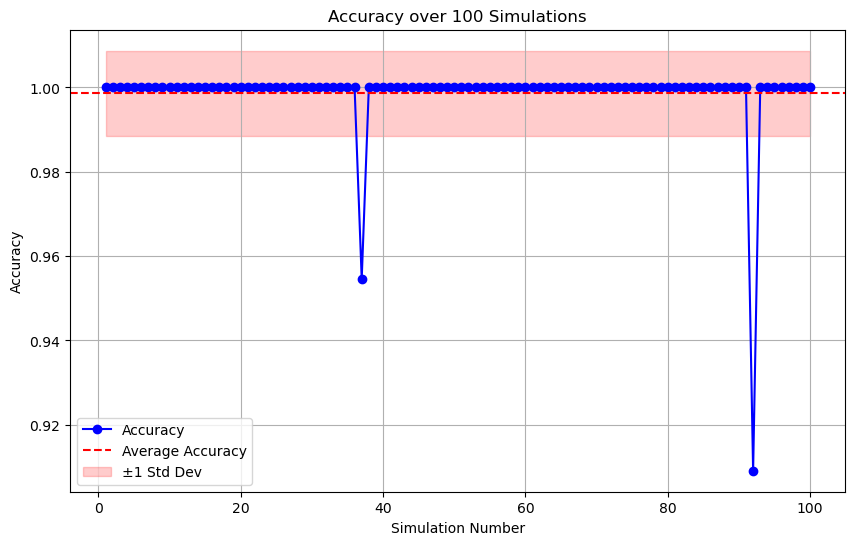

In [5]:
# Initialize a list to store the accuracies of each simulation
accuracies = []

# Perform 100 simulations
for _ in range(100):
    # Split the data into random training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
    # Create, train and make predictions with the SVC model
    model_linear = SVC(kernel='linear')
    model_linear.fit(X_train, y_train)
    predictions = model_linear.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    # Add the accuracy to the list
    accuracies.append(accuracy)

# Calculate the average accuracy over the 100 simulations
average_accuracy = np.mean(accuracies)
print("Average accuracy over 100 simulations:", average_accuracy)

# Calculate the standard deviation of the accuracies
std_deviation = np.std(accuracies)
print("Standard deviation of accuracies over 100 simulations:", std_deviation)

# Plot the accuracies over the 100 simulations
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.axhline(y=average_accuracy, color='r', linestyle='--', label='Average Accuracy')
plt.fill_between(range(1, 101), 
                 [average_accuracy - std_deviation] * 100, 
                 [average_accuracy + std_deviation] * 100, 
                 color='r', alpha=0.2, label='±1 Std Dev')
plt.title('Accuracy over 100 Simulations')
plt.xlabel('Simulation Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("accuracy_simulations.png", dpi=300, bbox_inches='tight')